In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import csv
import pandas as pd
from scipy.optimize import least_squares

In [8]:
def load_obj(filename):
    vertices = []
    faces = []
    lines = []
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith('v '):
                vertices.append(list(map(float, line[2:].strip().split())))
            elif line.startswith('f '):
                face = list(map(int, line[2:].strip().split()))
                faces.append([i-1 for i in face])
            elif line.startswith('l '):
                line = list(map(int, line[2:].strip().split()))
                lines.append([i-1 for i in line])
    return np.array(vertices), np.array(faces), np.array(lines)



def plot_obj(vertices, faces, lines):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], s=0.1)

    for face in faces:
        xs = vertices[face, 0]
        ys = vertices[face, 1]
        zs = vertices[face, 2]
        if len(np.unique(xs)) < 3 or len(np.unique(ys)) < 3:
            continue
        ax.plot_trisurf(xs, ys, zs, linewidth=0.2, antialiased=True, color='k')

    for line in lines:
        xs = vertices[line, 0]
        ys = vertices[line, 1]
        zs = vertices[line, 2]
        ax.plot(xs, ys, zs, linewidth=0.2, antialiased=True, color='k')

    plt.show()
    
def plot_surface(vertices, faces):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    xs = vertices[:, 0]
    ys = vertices[:, 1]
    zs = vertices[:, 2]
    ax.plot_trisurf(xs, ys, zs, triangles=faces, linewidth=0.2, antialiased=True, color='r', alpha=0.2)

    plt.show()

    
def save_csv(filename, vertices):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['X', 'Y', 'Z'])
        writer.writerows(vertices)

<IPython.core.display.Javascript object>


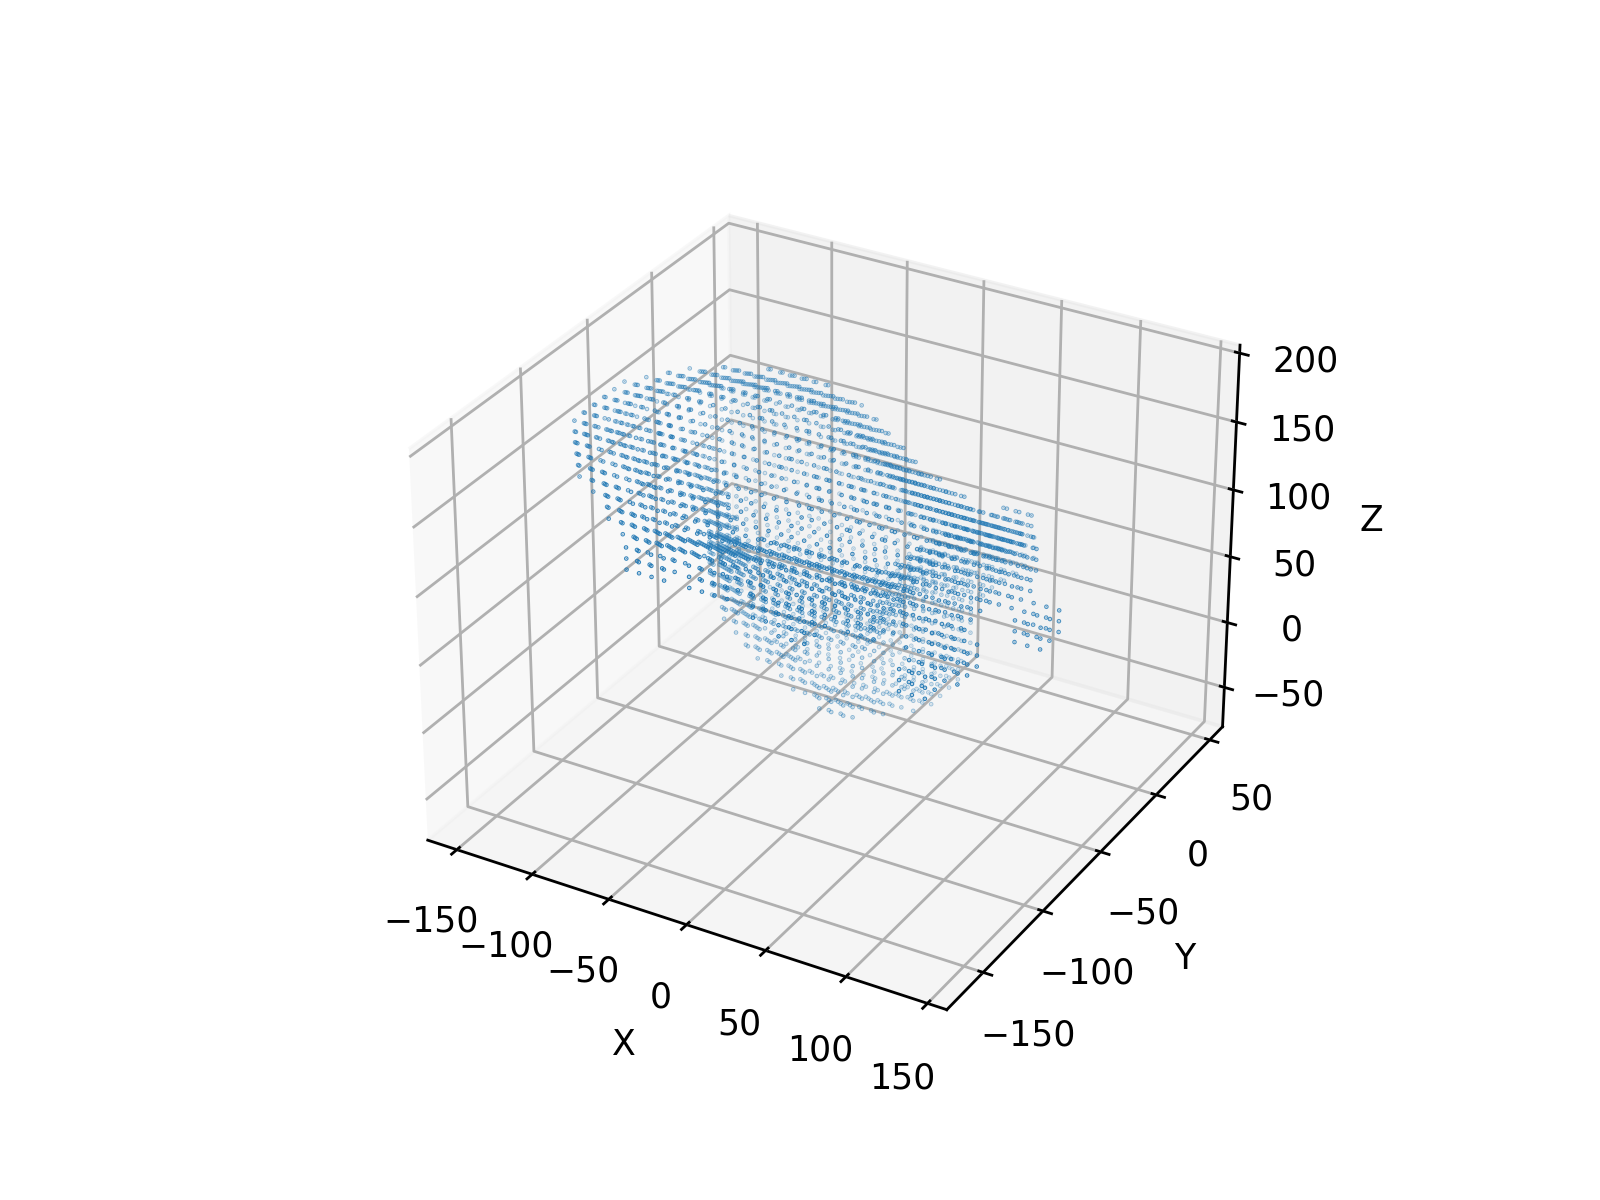

In [9]:
vertices, faces, lines = load_obj('laniakea.obj')
plot_obj(vertices, faces, lines)

<IPython.core.display.Javascript object>


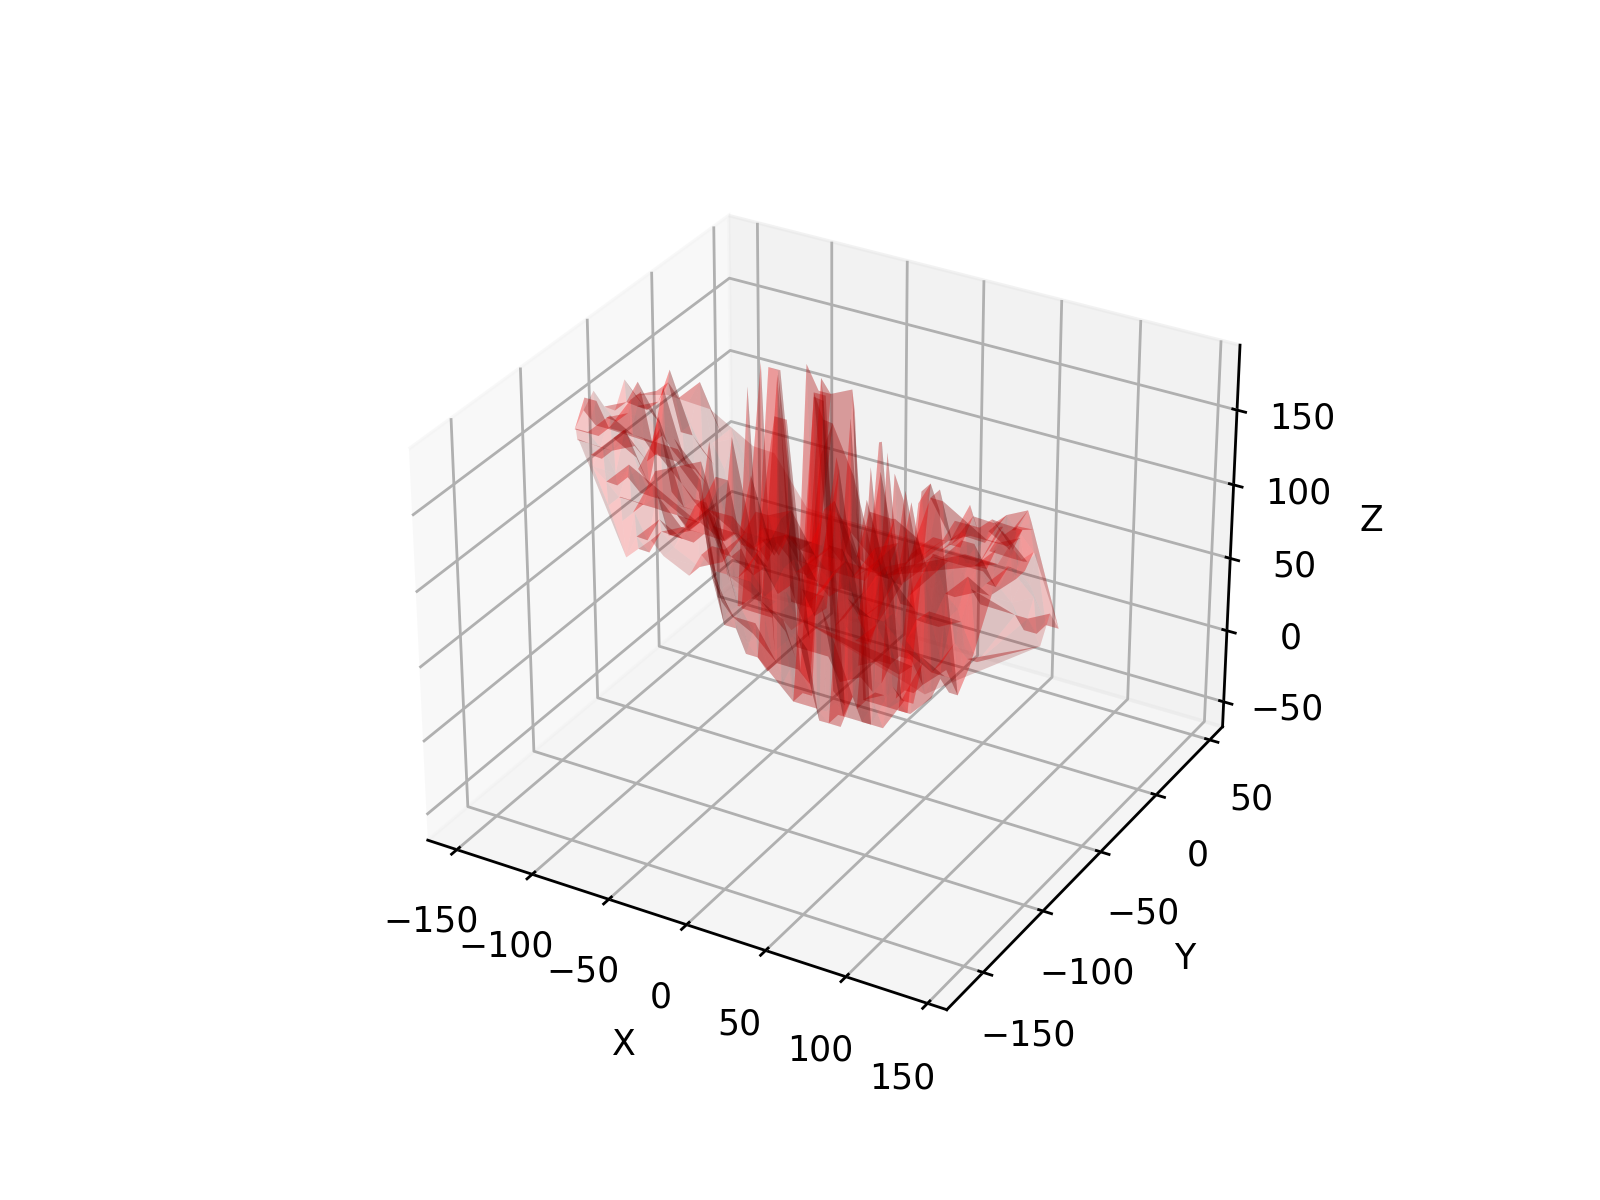

In [10]:
plot_surface(vertices, faces)

In [11]:
save_csv('laniakea.csv', vertices)